# Neural Network

# Forestfires dataset

In [3]:
# Importing the necessary packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd

In [5]:
# load forestfires dataset
dataset = pd.read_csv("C:/Users/Admin/Documents/data science assignment/Neural network/forestfires.csv")
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_dataset = LabelEncoder()
dataset=dataset.apply(LabelEncoder().fit_transform)

In [8]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,1,0,0,0,0,1
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
data = dataset.values
data

array([[ 7,  0, 28, ...,  0,  0,  1],
       [10,  5, 56, ...,  1,  0,  1],
       [10,  2, 56, ...,  1,  0,  1],
       ...,
       [ 1,  3,  9, ...,  0,  0,  0],
       [ 1,  2, 92, ...,  0,  0,  1],
       [ 9,  5,  7, ...,  0,  0,  1]], dtype=int64)

In [11]:
X =  data[:,0:-1]
y = data[:,-1]

In [12]:
X

array([[ 7,  0, 28, ...,  0,  0,  0],
       [10,  5, 56, ...,  0,  1,  0],
       [10,  2, 56, ...,  0,  1,  0],
       ...,
       [ 1,  3,  9, ...,  0,  0,  0],
       [ 1,  2, 92, ...,  0,  0,  0],
       [ 9,  5,  7, ...,  1,  0,  0]], dtype=int64)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

In [15]:
model = Sequential()
model.add(Dense(50, input_dim=30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid')) 

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
hist = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10) 

Epoch 1/150
35/35 [==============================] - 4s 61ms/step - loss: 0.5066 - acc: 0.8212 - val_loss: 0.2262 - val_acc: 0.8889
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.1059 - acc: 0.9740 - val_loss: 0.1741 - val_acc: 0.9181
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.1335 - acc: 0.9559 - val_loss: 0.1331 - val_acc: 0.9532
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0850 - acc: 0.9640 - val_loss: 0.1332 - val_acc: 0.9532
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0609 - acc: 0.9858 - val_loss: 0.1169 - val_acc: 0.9415
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0668 - acc: 0.9752 - val_loss: 0.1343 - val_acc: 0.9415
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0733 - acc: 0.9683 - val_loss: 0.1712 - val_acc: 0.9123
Epoch 8/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0521 - 

35/35 [==============================] - 0s 2ms/step - loss: 0.0069 - acc: 0.9956 - val_loss: 0.4790 - val_acc: 0.9357
Epoch 125/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0088 - acc: 0.9960 - val_loss: 0.4213 - val_acc: 0.9298
Epoch 126/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0290 - acc: 0.9876 - val_loss: 0.3895 - val_acc: 0.9240
Epoch 127/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9956 - val_loss: 0.5031 - val_acc: 0.9298
Epoch 128/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0106 - acc: 0.9989 - val_loss: 0.6918 - val_acc: 0.9181
Epoch 129/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0179 - acc: 0.9955 - val_loss: 0.4027 - val_acc: 0.9415
Epoch 130/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0050 - acc: 0.9994 - val_loss: 0.4647 - val_acc: 0.9357
Epoch 131/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0107 -

In [18]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 2ms/step - loss: 0.1959 - acc: 0.9787
acc: 97.87%


In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

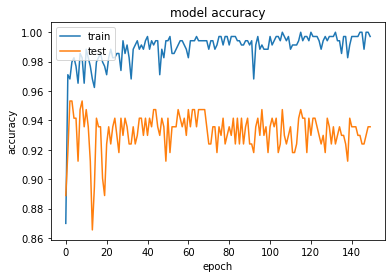

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

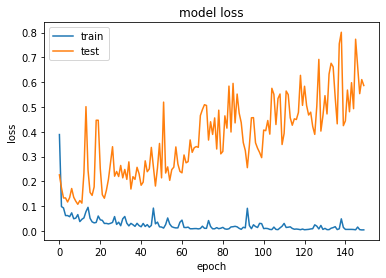

In [21]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()